In [3]:
%matplotlib inline
import player as data_pl
import team as data_te
import game as data_ga
import utils as anal_ut
import multiprocessing as mp
import numpy as np
import scipy
import scipy.stats as scst
import datetime
from numpy import linalg
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import matplotlib.colors as colors
import pandas as pd
import time
from sklearn import cluster
from sklearn import linear_model
from collections import Counter
import math
import statsmodels.api as sm
import urllib2
import re
import os
import unicodedata
import pulp_lineup_optimization as lopt
from scipy import special
import dfs_utils

In [3]:
PlayerList = data_pl.PlayerList(season='2015-16', only_current=1).info()
PlayerList = PlayerList.set_index('PERSON_ID')

global_stats = pd.read_csv('global_stats.csv', index_col=0)
global_stats.GAME_DATE = [datetime.datetime.strptime(x, '%Y-%m-%d').date() for x in global_stats.GAME_DATE]
global_stats = global_stats.sort('GAME_DATE')

In [5]:
global_stats = dfs_utils.get_global_stats()
global_stats

,AST,BLK,DD,DK,DP,DREB,FD,FG3A,FG3M,FG3_PCT,...,PTS,Player_ID,REB,SEASON_ID,STL,TEAM,TOV,VIDEO_AVAILABLE,WL,YH
1595,2,9,NaN,74.25,NaN,8,73.4,0,0,0.000,...,26,203076,17,22014,3,NOP,0,1,W,NaN
2251,3,0,NaN,14.75,NaN,1,14.7,2,0,0.000,...,7,203085,1,22014,1,NOP,0,1,W,NaN
9316,0,0,NaN,1.25,NaN,1,1.2,0,0,0.000,...,0,203481,1,22014,0,NOP,0,1,W,NaN
12625,0,2,NaN,20.00,NaN,4,17.8,2,1,0.500,...,8,201569,4,22014,2,NOP,3,1,W,NaN
13345,0,0,NaN,1.50,NaN,0,1.0,0,0,0.000,...,2,201582,0,22014,0,NOP,1,1,W,NaN
13406,0,0,NaN,34.75,NaN,2,32.8,6,3,0.500,...,22,201583,9,22014,0,NOP,0,1,W,NaN
14069,2,5,NaN,46.75,NaN,10,44.4,0,0,0.000,...,14,201600,17,22014,0,NOP,3,1,W,NaN
16417,6,0,NaN,32.25,NaN,7,31.8,1,0,0.000,...,12,201936,9,22014,0,NOP,0,1,W,NaN
18225,4,1,NaN,23.50,NaN,2,22.4,3,0,0.000,...,8,201950,2,22014,3,NOP,2,1,W,NaN
19381,0,0,NaN,0.00,NaN,0,0.0,0,0,0.000,...,0,202337,0,22014,0,NOP,0,1,W,NaN


In [225]:
data = pd.DataFrame()

iter_date = datetime.date(2015, 12, 16)
while iter_date < datetime.datetime.now().date():
    try:
        projs = pd.read_csv('Projections/fd_%s.csv' % iter_date, index_col=False)
    except IOError:
        try:
            projs = pd.read_csv('Projections/nba_%s.csv' % iter_date, index_col=False)
        except IOError:
            print iter_date
            iter_date += datetime.timedelta(days=1)
            continue
    projs['Index'] = ['%d_%s' % (x, iter_date) for x in projs.Player_ID]
    projs = projs.set_index('Index')
    sub = global_stats[global_stats.GAME_DATE==iter_date].copy()
    sub['Index'] = ['%d_%s' % (x, iter_date) for x in sub.Player_ID]
    sub = sub.set_index('Index')
    projs['True_FD'] = sub.FD
    projs['True_MIN'] = sub.MIN
    data = data.append(projs)
    
    iter_date += datetime.timedelta(days=1)

2015-12-24


In [411]:
# data.ADJ *= data.PROJ_MIN
sub = data[~np.isnan(data.ADJ)]
sub = sub[~np.isnan(sub.True_FD)]
sub = sub[sub.True_MIN > 15]

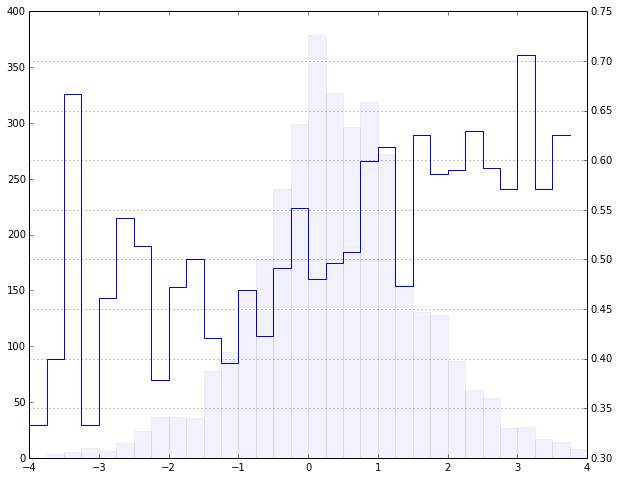

In [412]:
r = 1.

X = []
Y = []
N = []
dx = .25
for x in np.arange(-4,4,dx):
    I = (sub.ADJ/sub.PROJ_MIN*sub.True_MIN > x) & (sub.ADJ/sub.PROJ_MIN*sub.True_MIN < x+dx)
    J = sub.True_FD[I] > r*sub.PROJ_UNADJ_FD[I]/sub.PROJ_MIN[I]*sub.True_MIN[I]
    K = J
#     print '%+.2f\t%5d\t%.3f' % (x, len(K), np.mean(K))
    X.append(x)
    Y.append(np.mean(K))
    N.append(sum(I))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(X, N, width=dx, alpha=.05)
ax2.step(X,Y)
plt.xlim([-4,4])
plt.grid()
plt.show()

In [100]:
c = lambda w: np.corrcoef(sub.PROJ_FD*w + (1.-w)*sub.PROJ_CEIL_FD, sub.True_FD)[0,1]
zip(np.linspace(0,1,101), map(c, np.linspace(0,1,101)))

[(0.0, 0.62666705154361502),
 (0.01, 0.6271009519044799),
 (0.02, 0.6275300590058065),
 (0.029999999999999999, 0.62795432253702799),
 (0.040000000000000001, 0.62837369222592609),
 (0.050000000000000003, 0.62878811784779398),
 (0.059999999999999998, 0.62919754923470783),
 (0.070000000000000007, 0.62960193628490502),
 (0.080000000000000002, 0.6300012289722674),
 (0.089999999999999997, 0.63039537735590612),
 (0.10000000000000001, 0.63078433158984781),
 (0.11, 0.63116804193281706),
 (0.12, 0.63154645875811743),
 (0.13, 0.63191953256360223),
 (0.14000000000000001, 0.63228721398173648),
 (0.14999999999999999, 0.63264945378974891),
 (0.16, 0.63300620291986642),
 (0.17000000000000001, 0.6333574124696314),
 (0.17999999999999999, 0.6337030337122983),
 (0.19, 0.63404301810730701),
 (0.20000000000000001, 0.63437731731082725),
 (0.20999999999999999, 0.63470588318637422),
 (0.22, 0.63502866781549083),
 (0.23000000000000001, 0.63534562350849078),
 (0.23999999999999999, 0.63565670281526399),
 (0.25, 0

In [236]:
np.min(global_stats[(global_stats.TEAM=='PHI')&(global_stats.Player_ID==dfs_utils.get_pid('Smith, Ish'))&(global_stats.SEASON_ID==22015)].GAME_DATE)

datetime.date(2015, 12, 26)

                            OLS Regression Results                            
Dep. Variable:                True_FD   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                 2.070e+04
Date:                Wed, 27 Jan 2016   Prob (F-statistic):               0.00
Time:                        21:12:43   Log-Likelihood:                -10968.
No. Observations:                2980   AIC:                         2.194e+04
Df Residuals:                    2979   BIC:                         2.194e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
PROJ_UNADJ_FD     0.9892      0.007    143.858

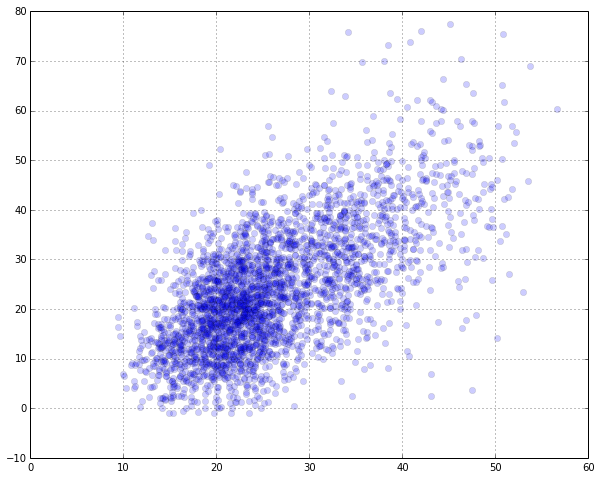

In [105]:
model = sm.OLS(sub.True_FD, sub.PROJ_UNADJ_FD)
print model.fit().summary()
plt.plot(sub.PROJ_FD*2./3 + 1./3*sub.PROJ_CEIL_FD, sub.True_FD, 'o', alpha=.2)
# plt.xlim([-5,5])
plt.grid()
plt.show()

#### Plot of Pr[FP > Proj | ADJ in bin] over ADJ. Bar graph is size of each bin.

In [172]:
tmp = sub[sub.Player_ID==dfs_utils.get_pid('Green, Draymond')]

In [173]:
x = tmp.PROJ_FD
y = tmp.True_FD

I = tmp.True_FD[1:] > tmp.PROJ_FD[1:]
J = tmp.True_FD[:-1] > tmp.PROJ_FD[:-1]
np.mean(tmp.True_FD > tmp.PROJ_FD), np.mean(I & J)

(0.5714285714285714, 0.61538461538461542)

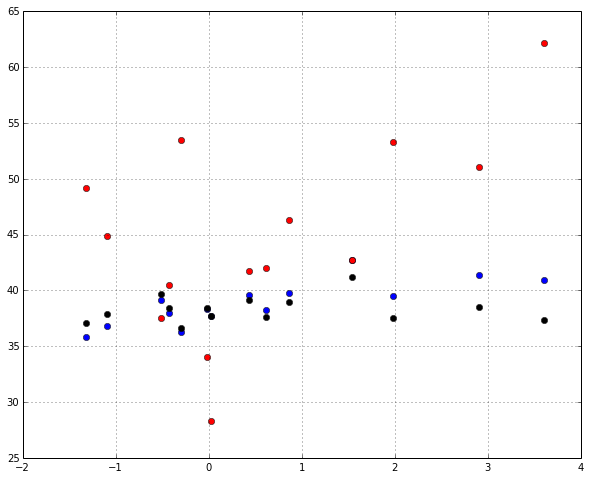

In [148]:
plt.plot(tmp.ADJ, tmp.PROJ_FD, 'bo')
plt.plot(tmp.ADJ, tmp.PROJ_UNADJ_FD, 'ko')
plt.plot(tmp.ADJ, tmp.True_FD, 'ro')
# plt.xlim([-5,5])
plt.grid()
plt.show()

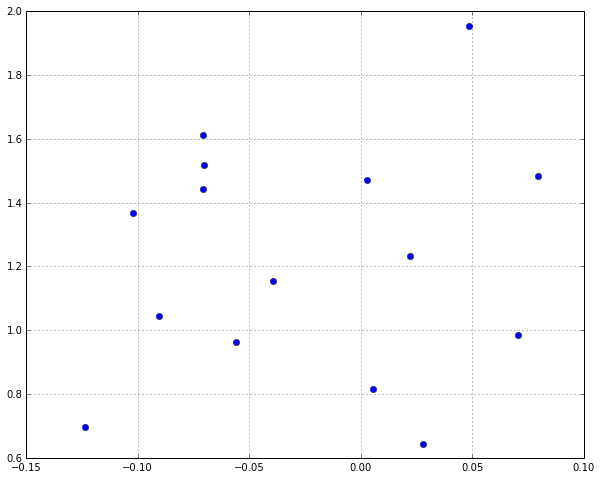

In [132]:
plt.plot(tmp.ADJ/tmp.PROJ_MIN, tmp.True_FD/tmp.True_MIN, 'o')
plt.grid()
plt.show()

In [318]:
iter_date = datetime.date(2015, 12, 16)
master = pd.DataFrame()
while iter_date < datetime.datetime.now().date():
    try:
        proj = pd.read_csv('Projections/fd_%s.csv' % iter_date, index_col=False)
    except:
        try:
            proj = pd.read_csv('Projections/nba_%s.csv' % iter_date, index_col=False)
        except:
            print 'projections not found:', iter_date
            iter_date += datetime.timedelta(days=1)
            continue
    proj['GAME_DATE'] = iter_date
    master = master.append(proj)
    iter_date += datetime.timedelta(days=1)

projections not found: 2015-12-24


In [323]:
hist = dfs_utils.get_global_stats()

In [348]:
sub = master[(~np.isnan(master.ADJ))&(np.isfinite(master.ADJ))][['Player_ID','ADJ','PROJ_UNADJ_FD','PROJ_MIN','GAME_DATE']]
sub

,Player_ID,ADJ,PROJ_UNADJ_FD,PROJ_MIN,GAME_DATE
0,201566,0.022894,39.831936,28.000000,2015-12-27
1,201142,0.110197,34.552850,28.000000,2015-12-27
2,202326,-0.025391,46.120825,34.857143,2015-12-27
4,2546,-0.018885,37.960944,35.000000,2015-12-27
5,202738,0.056076,29.424086,28.000000,2015-12-27
6,200765,0.046392,38.194350,37.000000,2015-12-27
7,201188,0.040752,32.721541,34.642857,2015-12-27
8,203468,0.138194,29.627798,34.500000,2015-12-27
9,200752,0.012417,33.357315,35.928571,2015-12-27
10,977,0.007181,27.254646,29.142857,2015-12-27


In [407]:
pid = dfs_utils.get_pid('Barnes, Matt')
tmp = sub[sub.Player_ID==pid].copy()
x = hist[hist.Player_ID==pid]
y = [x[x.GAME_DATE==z].iloc[0].FD if z in x.GAME_DATE.tolist() else 0 for z in tmp.GAME_DATE]
tmp['FD'] = y
y = [x[x.GAME_DATE==z].iloc[0].MIN if z in x.GAME_DATE.tolist() else 0 for z in tmp.GAME_DATE]
tmp['MIN'] = y
tmp['UNADJ_MIN'] = tmp.PROJ_UNADJ_FD / tmp.PROJ_MIN
tmp['FD_MIN'] = tmp.FD / tmp.MIN
tmp = tmp[tmp.MIN>0]

-0.10326238692 -0.100888050308


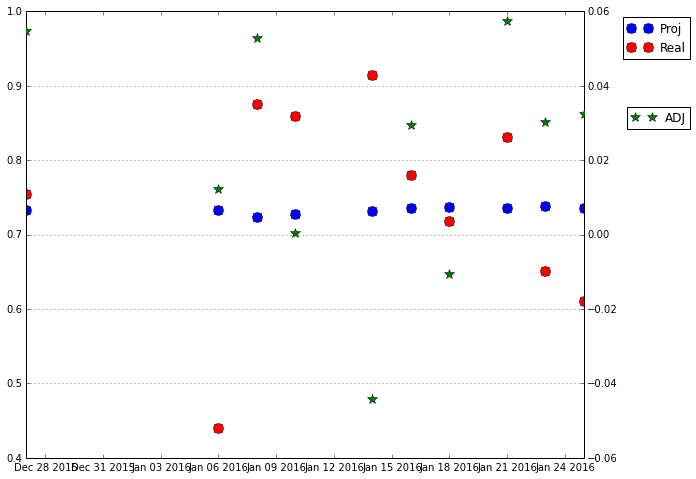

In [408]:
print np.corrcoef(tmp.FD_MIN-tmp.UNADJ_MIN, tmp.ADJ)[0,1], np.corrcoef(tmp.FD_MIN-tmp.UNADJ_MIN, tmp.ADJ/tmp.UNADJ_MIN)[0,1]
fig, ax1 = plt.subplots()
ax1.plot(tmp.GAME_DATE, tmp.UNADJ_MIN, 'bo', markersize=10, label='Proj')
ax1.plot(tmp.GAME_DATE, tmp.FD_MIN, 'ro', markersize=10, label='Real')
plt.legend(bbox_to_anchor=(1.2,1.0))

ax2 = ax1.twinx()
ax2.plot(tmp.GAME_DATE, tmp.ADJ, 'g*', markersize=10, label='ADJ')

plt.grid()
plt.legend(bbox_to_anchor=(1.2,.8))
plt.show()

In [397]:
d = {'LCF':[],'Player_ID':[],'Corr':[]}
for pid in np.unique(sub.Player_ID):
    pid = int(pid)
    lcf = dfs_utils.get_lcf(pid)
    tmp = sub[sub.Player_ID==pid].copy()
    x = hist[hist.Player_ID==pid]
    y = [x[x.GAME_DATE==z].iloc[0].FD if z in x.GAME_DATE.tolist() else 0 for z in tmp.GAME_DATE]
    tmp['FD'] = y
    y = [x[x.GAME_DATE==z].iloc[0].MIN if z in x.GAME_DATE.tolist() else 0 for z in tmp.GAME_DATE]
    tmp['MIN'] = y
    tmp['UNADJ_MIN'] = tmp.PROJ_UNADJ_FD / tmp.PROJ_MIN
    tmp['FD_MIN'] = tmp.FD / tmp.MIN
    tmp = tmp[tmp.MIN>0]
    try:
        d['Corr'].append(np.corrcoef(tmp.FD_MIN-tmp.UNADJ_MIN, tmp.ADJ)[0,1])
        d['LCF'].append(lcf)
        d['Player_ID'].append(pid)
        print '%25s\t%.4f' % (lcf, np.corrcoef(tmp.FD_MIN-tmp.UNADJ_MIN, tmp.ADJ)[0,1])
    except:
        print '%25s\tNone' % (lcf)

           Garnett, Kevin	-0.1480
             Bryant, Kobe	0.5109
              Duncan, Tim	0.1312
            Carter, Vince	-0.0115
           Nowitzki, Dirk	-0.0410
             Pierce, Paul	0.0093
            Miller, Andre	-0.5750
             Terry, Jason	0.0554
       World Peace, Metta	1.0000
           Ginobili, Manu	0.2974
             Miller, Mike	0.3490
          Crawford, Jamal	0.0174
          Chandler, Tyson	-0.0934
               Gasol, Pau	0.3990
             Johnson, Joe	-0.4828
       Jefferson, Richard	0.2749
           Randolph, Zach	-0.2410
             Parker, Tony	-0.2595
          Andersen, Chris	0.8151
           Dunleavy, Mike	None
             Gooden, Drew	-0.4736
                     Nene	0.4571
       Stoudemire, Amar'e	-0.2193
            Butler, Caron	None
         Prince, Tayshaun	0.1896
             Barnes, Matt	-0.1033
           Butler, Rasual	0.0944
              Scola, Luis	-0.0314
            James, LeBron	0.4562
         Anthony, Carmelo	0.1031
  

In [409]:
corrs = pd.DataFrame(d).set_index('LCF')
corrs.sort('Corr', ascending=False)['Corr']

LCF
Stokes, Jarnell        1.000000
Motiejunas, Donatas    1.000000
Rozier, Terry          1.000000
Perkins, Kendrick      1.000000
World Peace, Metta     1.000000
Millsap, Elijah        0.999220
Augustin, D.J.         0.986788
Bonner, Matt           0.956381
Andersen, Chris        0.815116
Barnes, Harrison       0.805954
Mejri, Salah           0.795770
Babbitt, Luke          0.783008
Johnson, Stanley       0.779145
Evans, Jeremy          0.777670
McDaniels, KJ          0.752790
Price, Ronnie          0.736940
Conley, Mike           0.721880
Leuer, Jon             0.720879
Hawes, Spencer         0.716715
Varejao, Anderson      0.714624
Nogueira, Lucas        0.705159
Howard, Dwight         0.688383
Whiteside, Hassan      0.683596
Pekovic, Nikola        0.671098
Young, Joe             0.625340
Neal, Gary             0.624858
Bass, Brandon          0.605047
Oubre, Kelly           0.595102
Acy, Quincy            0.592787
Karasev, Sergey        0.588056
                         ...   
Smit

In [410]:
corrs.loc['Harden, James']

Corr              0.264674
Player_ID    201935.000000
Name: Harden, James, dtype: float64

In [414]:
hourly = 60.
hours_wk = 40
tax_rate = .4
weeks = 4*6
wage = (1-tax_rate)*hourly*hours_wk*weeks
rent = 1350*4
food = 6*300
transportation = 6*(60 + 130)
print wage - rent - food - transportation

26220.0


In [35]:
class Loan(object):
    def __init__(self, principal, interest, note=''):
        self.P = principal
        self.r = interest
        self.note = note
    
    def update(self):
        iacc = self.P*self.r/365.
        self.P += iacc
        return self.P
    
    def payoff(self, payment):
        self.P -= payment
        return self.P

class RecurringCashFlow(object):
    def __init__(self, amount, schedule, start_date, note=''):
        self.amt = amount
        self.dt = lambda x: x + datetime.timedelta(days=schedule)
        self.root = self.dt(start_date)
        self.note = note
    
    def update(self, date):
        if date == self.root:
            self.root = self.dt(date)
            return self.amt
        return 0

class OneTimeCashFlow(object):
    def __init__(self, amount, date, note=''):
        self.amt = amount
        self.date = date
        self.note = note
    
    def update(self, date):
        if self.date == date:
            return self.amt
        return 0

In [71]:
# todays date
start_date = datetime.date(2016,2,1)
end_date = datetime.date(2017, 12, 31)

# current balance and interest rates of loans
loans = [
    Loan(25350.+2500, .0721, 'Plus1'),
    Loan(25351.+2500, .0721, 'Plus2'),
    Loan(15000.+21.6, .0684, 'Plus3'),
    Loan(20500.+1400, .0621, 'Unsub1'),
    Loan(10250.+457.16, .0584, 'Unsub2'),
]

# estimated income and living expenses which should recur
cfs = [
    RecurringCashFlow(.6*80*60, 14, datetime.date(2016, 7, 14), 'wage'),
    RecurringCashFlow(-1350.,   30, datetime.date(2016, 9, 1), 'rent'),
    RecurringCashFlow(-300,     30, datetime.date(2016, 2, 1), 'food'),
    RecurringCashFlow(-32,      14, datetime.date(2016, 2, 1), 'uber'),
    RecurringCashFlow(-130,     30, datetime.date(2016, 6, 1), 'train'),
    RecurringCashFlow(-75,      30, datetime.date(2016, 2, 1), 'utils'),
    RecurringCashFlow(-5,       1, datetime.date(2016, 2, 1), 'discretionary')
]

# estimated one time incomes or expenses
otcfs = [
    OneTimeCashFlow(25000., datetime.date(2016, 3, 14), 'signing bonus'),
    OneTimeCashFlow(9100., datetime.date(2016, 5, 14), 'tax refund 2015'),
    OneTimeCashFlow(25000., datetime.date(2017, 2, 14), 'annual bonus'),
    OneTimeCashFlow(9100., datetime.date(2017, 5, 14), 'tax refund 2016'),
]

bank = 4000.     # starting bank account
min_bank = 10000. # smallest amount to have left after paying off loans

d = dict(Date=[], Bank=[], LoanPayment=[], Loans=[])
iter_date = start_date
while iter_date <= end_date:
    bank += sum([x.update(iter_date) for x in cfs])
    bank += sum([x.update(iter_date) for x in otcfs])
    payoff = max(bank-min_bank, 0)
    for x in loans:
        x.update()
    loans = sorted(loans, key=lambda x: -x.r if x.P > 0 else 0)
    
    paid = 0
    ind = 0
    if payoff > 0:
        while paid < payoff and sum(map(lambda x: x.P, loans)) > 0 and ind < len(loans):
            delta = min(payoff-paid, loans[ind].P)
            loans[ind].payoff(delta)
            paid += delta
            ind += 1
        bank -= paid
    
    d['Date'].append(iter_date)
    d['Bank'].append(bank)
    d['LoanPayment'].append(paid)
    d['Loans'].append(sum([x.P for x in loans]))
    iter_date += datetime.timedelta(days=1)
table = pd.DataFrame(d)
table

,Bank,Date,LoanPayment,Loans
0,4000.000000,2016-02-01,0,103349.017007
1,3995.000000,2016-02-02,0,103368.277624
2,3990.000000,2016-02-03,0,103387.541850
3,3985.000000,2016-02-04,0,103406.809686
4,3980.000000,2016-02-05,0,103426.081134
5,3975.000000,2016-02-06,0,103445.356193
6,3970.000000,2016-02-07,0,103464.634864
7,3965.000000,2016-02-08,0,103483.917149
8,3960.000000,2016-02-09,0,103503.203047
9,3955.000000,2016-02-10,0,103522.492560


Total Loan Cost: $108907.71


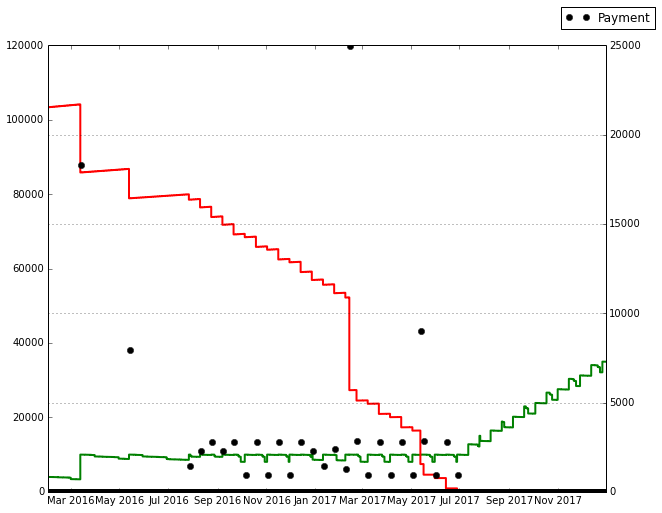

In [72]:
print 'Total Loan Cost: $%.2f' % table.LoanPayment.sum()

fig, ax1, = plt.subplots()
ax1.step(table.Date, table.Bank, 'g', label='Bank', linewidth=2)
ax1.step(table.Date, table.Loans, 'r', label='Loans', linewidth=2)
ax2 = ax1.twinx()
ax2.plot(table.Date, table.LoanPayment, 'ko', label='Payment')
plt.grid()
plt.legend(bbox_to_anchor=(1.1,1.1))
plt.show()